<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset.


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [3]:
import pandas as pd


Import matplotlib


In [4]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [5]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [7]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [12]:
## Write your code here
df.duplicated().sum()


np.int64(20)

In [13]:
df.duplicated().head(20)

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [14]:
duplicate_rows = df[df.duplicated()]
print("First few duplicate rows:")
print(duplicate_rows.head())


First few duplicate rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-source projects;Other...   


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [16]:
## Write your code here
df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'])


,0
0,False
1,True
2,True
3,False
4,False
...,...
65452,True
65453,True
65454,True
65455,True


In [18]:
selected_cols = ['MainBranch', 'Employment', 'RemoteWork']
duplicates_subset = df[df.duplicated(subset=selected_cols, keep=False)]

# Group by the selected columns to compare the rest
grouped = duplicates_subset.groupby(selected_cols)

# For each group, check which columns (other than the selected ones) are identical
from collections import Counter

identical_columns_counter = Counter()

for _, group in grouped:
    for col in df.columns:
        if col not in selected_cols:
            if group[col].nunique(dropna=False) == 1:  # identical values
                identical_columns_counter[col] += 1

# Convert to DataFrame for a cleaner view
identical_cols_df = pd.DataFrame.from_dict(identical_columns_counter, orient='index', columns=['Identical_in_Groups'])
identical_cols_df.sort_values(by='Identical_in_Groups', ascending=False)


,Identical_in_Groups
Check,319
AINextMuch less integrated,213
ConvertedCompYearly,165
AINextLess integrated,161
BuildvsBuy,161
...,...
OfficeStackSyncHaveWorkedWith,5
YearsCode,4
LearnCode,4
LanguageHaveWorkedWith,4


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


<ipython-input-19-c610303f337e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")


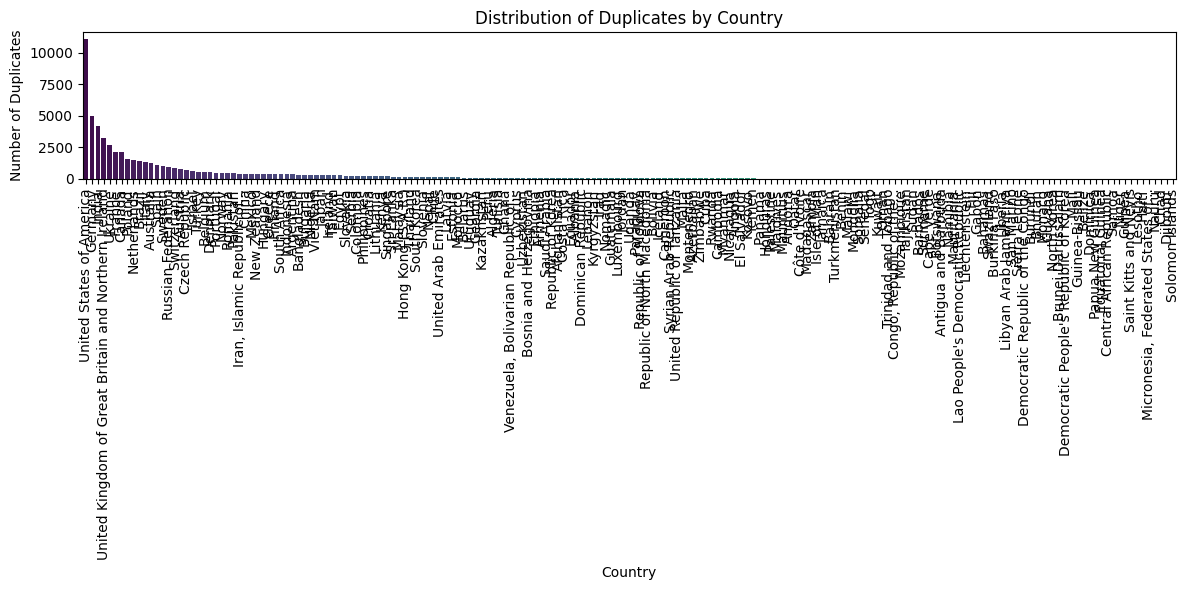

In [19]:
## Write your code here
# Define the columns to detect duplicates on
duplicate_cols = ['MainBranch', 'Employment', 'RemoteWork']

# Get duplicate rows based on selected columns
duplicate_rows = df[df.duplicated(subset=duplicate_cols, keep=False)]

import matplotlib.pyplot as plt
import seaborn as sns

# Count of duplicates by Country
country_counts = duplicate_rows['Country'].value_counts()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribution of Duplicates by Country")
plt.xlabel("Country")
plt.ylabel("Number of Duplicates")
plt.tight_layout()
plt.show()


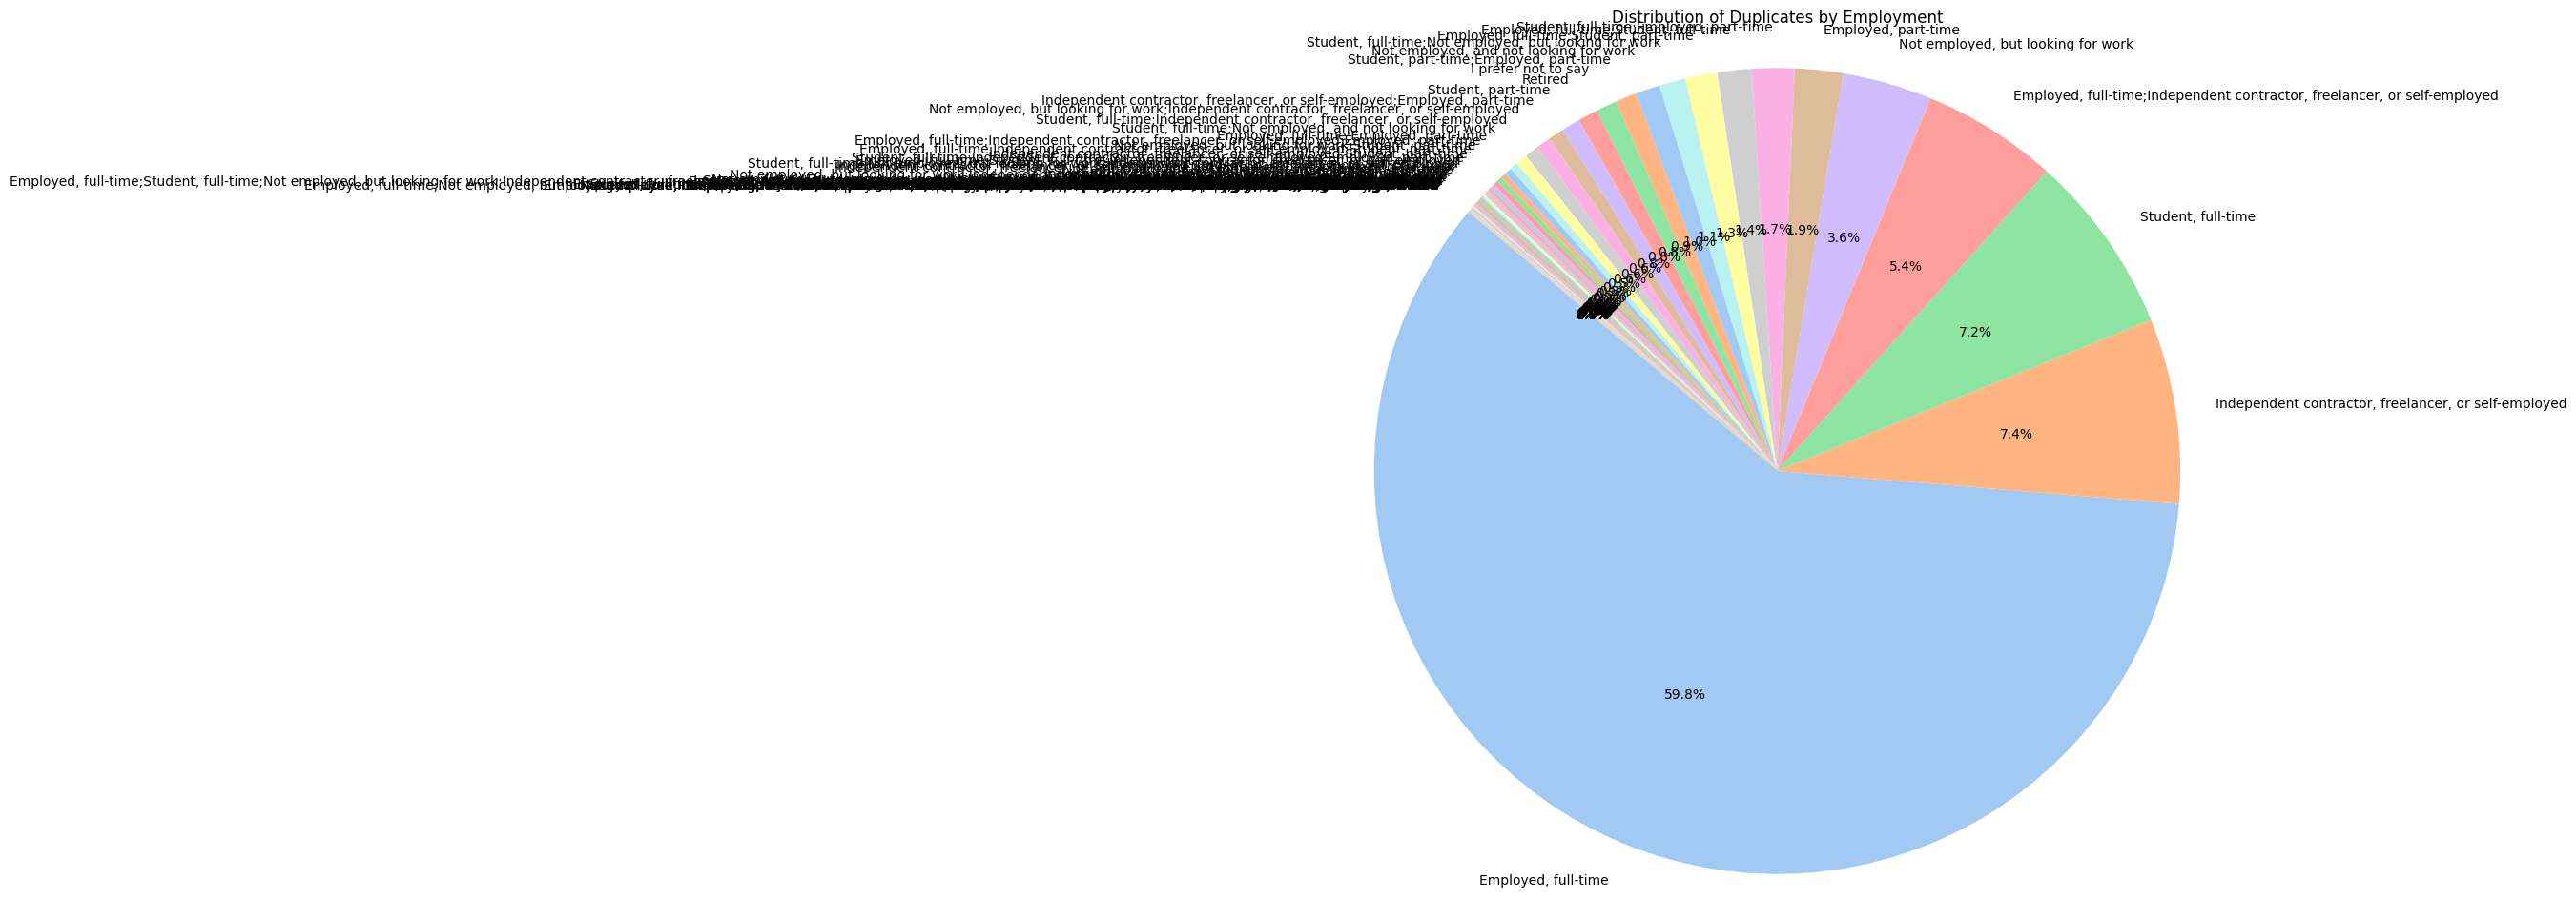

In [24]:
# Count of duplicates by Employment
employment_counts = duplicate_rows['Employment'].value_counts()

# Pie chart
plt.figure(figsize=(12, 12))
plt.pie(employment_counts.values, labels=employment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of Duplicates by Employment")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


<ipython-input-25-04971f2301d6>:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


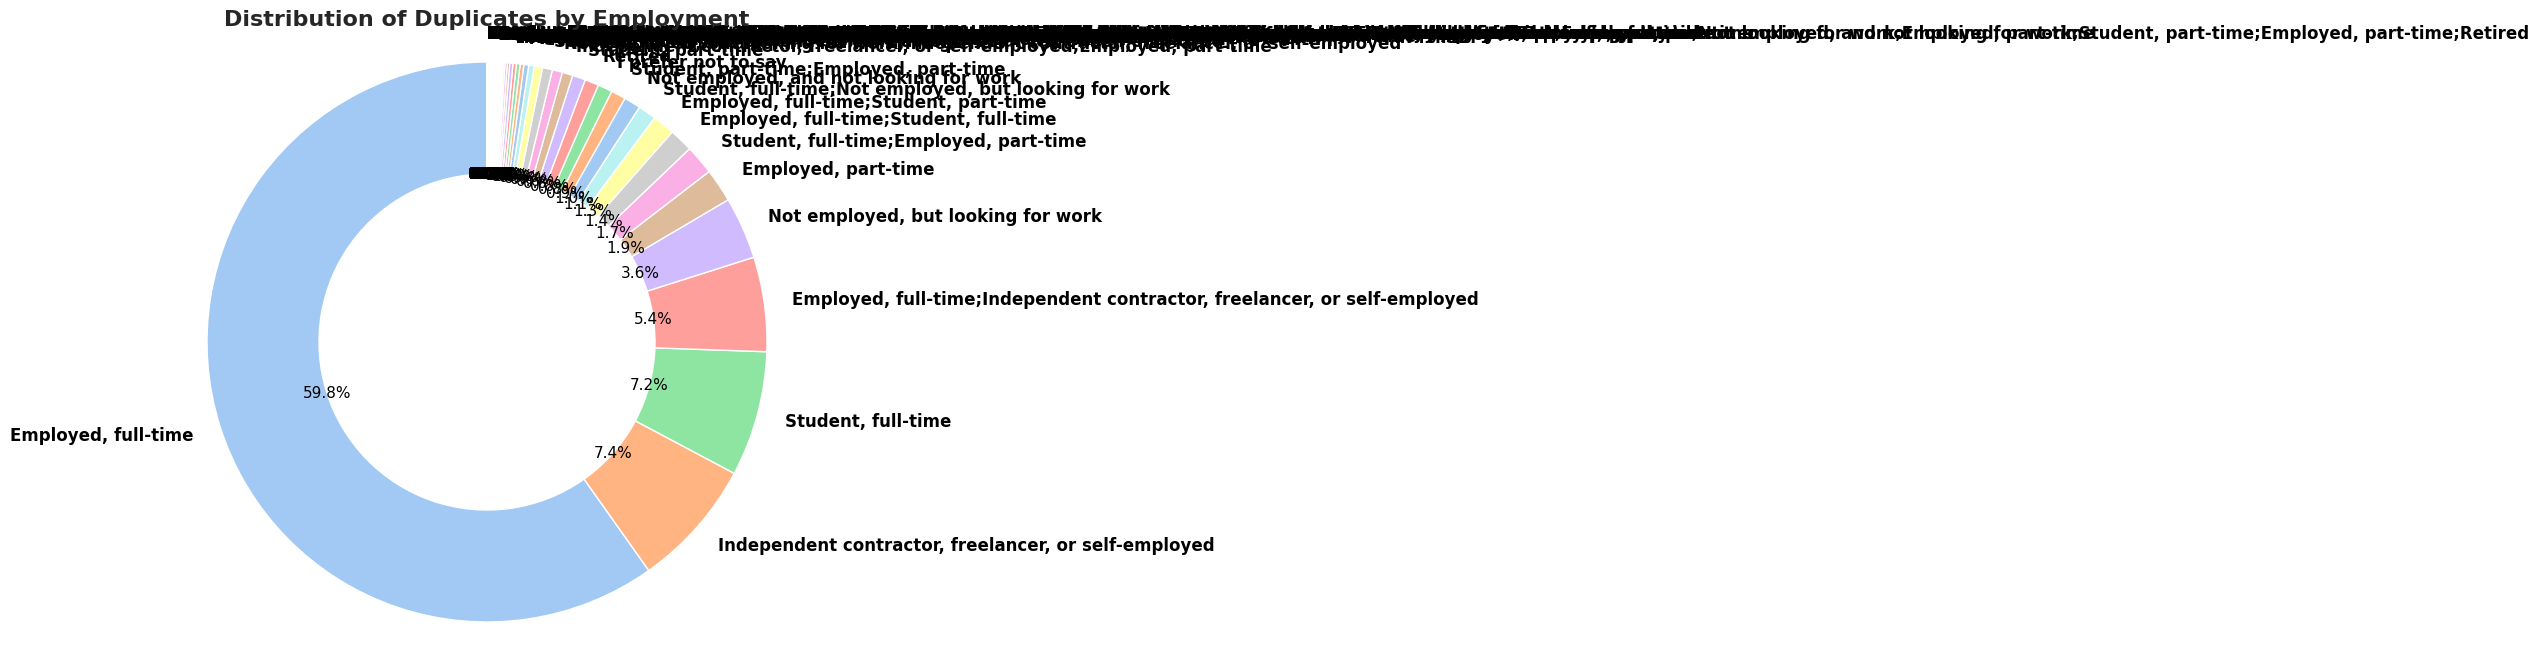

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and count duplicate rows by Employment
employment_counts = duplicate_rows['Employment'].value_counts()

# Reset style if needed (avoids overlaps from previous charts)
plt.clf()
plt.close('all')

# Set Seaborn style
sns.set_style("whitegrid")

# Choose colors from a pastel palette
colors = sns.color_palette("pastel")[0:len(employment_counts)]

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    employment_counts.values,
    labels=employment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='white'),  # donut-style
    textprops=dict(color="black")
)

# Customize text appearance
for text in texts:
    text.set_fontsize(12)
    text.set_weight('bold')

for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_color('black')

# Set title
ax.set_title("Distribution of Duplicates by Employment", fontsize=16, weight='bold')

# Equal aspect ratio ensures pie is a circle
ax.axis('equal')

# Tight layout to prevent clipping
plt.tight_layout()
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [ ]:
## Write your code here

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
